## Import dataset

In [43]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

# Read csv file into pandas dataframe 
# url = https://data.gov.ie/dataset/tmq01-visits-to-and-from-ireland/resource/d018a88d-6944-4728-aa62-cd05074ffa5e
df = pd.read_csv("TMQ01-Visits-to-and-from-Ireland.csv")

## Explore Imported Dataset

#### Dataset describes travel to and from Ireland by routes between the years of 1985 and 2008.

In [44]:
# Prints out the first few rows
df.head(20)

,ROUTE,Route of Travel,TLIST(Q1),Quarter,STATISTIC,Statistic Label,UNIT,VALUE
0,0,All Routes,19851,1985Q1,TMQ01C1,Visitors to Ireland,Thousand,254
1,0,All Routes,19851,1985Q1,TMQ01C2,Visits Abroad by Irish Residents,Thousand,186
2,0,All Routes,19852,1985Q2,TMQ01C1,Visitors to Ireland,Thousand,495
3,0,All Routes,19852,1985Q2,TMQ01C2,Visits Abroad by Irish Residents,Thousand,336
4,0,All Routes,19853,1985Q3,TMQ01C1,Visitors to Ireland,Thousand,840
5,0,All Routes,19853,1985Q3,TMQ01C2,Visits Abroad by Irish Residents,Thousand,495
6,0,All Routes,19854,1985Q4,TMQ01C1,Visitors to Ireland,Thousand,324
7,0,All Routes,19854,1985Q4,TMQ01C2,Visits Abroad by Irish Residents,Thousand,240
8,0,All Routes,19861,1986Q1,TMQ01C1,Visitors to Ireland,Thousand,255
9,0,All Routes,19861,1986Q1,TMQ01C2,Visits Abroad by Irish Residents,Thousand,213


In [45]:
# Dataframe is composed of 8 Columns and 960 Rows
df.shape

(960, 8)

In [4]:
df.describe()

,ROUTE,TLIST(Q1),VALUE
count,960.000000,960.00000,960.000000
mean,2.000000,19967.50000,415.230208
std,1.414951,69.26698,469.581397
min,0.000000,19851.00000,5.000000
25%,1.000000,19909.25000,97.750000
50%,2.000000,19967.50000,225.000000
75%,3.000000,20025.75000,551.250000
max,4.000000,20084.00000,2645.000000


#### Dataset contains categorical and quantitative variables 
#### Categorical = 
#### Quantitative = 

In [41]:
df.dtypes

ROUTE               int64
Route of Travel    object
TLIST(Q1)           int64
Quarter            object
STATISTIC          object
Statistic Label    object
UNIT               object
VALUE               int64
dtype: object

## Edit Dataframe - Data Cleaning

### Remove, Rename and Transform columns  

In [5]:
# Remove 'UNIT' column as 'VALUE' column heading will be amended to reflect units. 
# Remove 'ROUTE' column as 'Route of Travel' contains the same information in human readable language.
# Remove 'STATISTIC' column as this data is contained within 'Quarter' and 'Statistic Label' columns in human readable language.
tourism_df = df.drop(columns=['UNIT', 'ROUTE', 'STATISTIC'])

# Rename 'TLIST(Q1)' column to Year
tourism_df.rename(columns={"TLIST(Q1)": "Year"}, inplace=True)

# Last character in 'Year' column refers to quarter (1-4) 
# Remove last character from by dividing by 10 and saving as integer to remove non-whole numbers. e.g. 19854 -> 1985.4 = 1985
tourism_df["Year"] = tourism_df["Year"].transform(lambda x: x / 10).astype(int)

# The'Quarter' column contains the year and Q before the number designating the quarter. e.g. 1985Q4
# Transform 'Quarter' column, reassigning last character of each entry as integer reflecting the quarter. e.g. 1985Q4 = 4
tourism_df["Quarter"] = tourism_df["Quarter"].transform(lambda x: str(x)[-1]).astype(int)

# Rename 'Statistic Label' column for Inbound/Outbound
tourism_df.rename(columns={"Statistic Label": "Inbound/Outbound"}, inplace=True)

# Rename Column for Travellers x 1,000
tourism_df.rename(columns={"VALUE": "Travellers (x 1,000)"}, inplace=True)

## Explore Edited Dataframe

In [6]:
# Select cross channel travel by both sea and air for each quarter and year
cross_channel_df = tourism_df[tourism_df.isin(['Air Cross Channel', 'Sea Cross Channel'])['Route of Travel']==True]
pd.set_option('display.max_rows', cross_channel_df.shape[0]+1)
cross_channel_df

,Route of Travel,Year,Quarter,Inbound/Outbound,"Travellers (x 1,000)"
192,Air Cross Channel,1985,1,Visitors to Ireland,110
193,Air Cross Channel,1985,1,Visits Abroad by Irish Residents,65
194,Air Cross Channel,1985,2,Visitors to Ireland,142
195,Air Cross Channel,1985,2,Visits Abroad by Irish Residents,91
196,Air Cross Channel,1985,3,Visitors to Ireland,186
197,Air Cross Channel,1985,3,Visits Abroad by Irish Residents,113
198,Air Cross Channel,1985,4,Visitors to Ireland,112
199,Air Cross Channel,1985,4,Visits Abroad by Irish Residents,95
200,Air Cross Channel,1986,1,Visitors to Ireland,106
201,Air Cross Channel,1986,1,Visits Abroad by Irish Residents,86


In [7]:
# Combine Air and Sea cross channel travel into Cross channel travel dataframe
combined_cross_channel = cross_channel_df.groupby(['Year', 'Quarter', 'Inbound/Outbound'], as_index=False).sum()
combined_cross_channel['Route of Travel'] = 'Cross Channel'
combined_cross_channel

,Year,Quarter,Inbound/Outbound,Route of Travel,"Travellers (x 1,000)"
0,1985,1,Visitors to Ireland,Cross Channel,211
1,1985,1,Visits Abroad by Irish Residents,Cross Channel,140
2,1985,2,Visitors to Ireland,Cross Channel,366
3,1985,2,Visits Abroad by Irish Residents,Cross Channel,221
4,1985,3,Visitors to Ireland,Cross Channel,608
5,1985,3,Visits Abroad by Irish Residents,Cross Channel,329
6,1985,4,Visitors to Ireland,Cross Channel,261
7,1985,4,Visits Abroad by Irish Residents,Cross Channel,186
8,1986,1,Visitors to Ireland,Cross Channel,216
9,1986,1,Visits Abroad by Irish Residents,Cross Channel,162


In [8]:
tourism_df = tourism_df.drop(
    tourism_df[tourism_df.isin(['Air Cross Channel', 'Sea Cross Channel'])['Route of Travel']==True].index)

In [9]:
# Prints out the first few rows
pd.set_option('display.max_rows', tourism_df.shape[0]+1)
tourism_df

,Route of Travel,Year,Quarter,Inbound/Outbound,"Travellers (x 1,000)"
0,All Routes,1985,1,Visitors to Ireland,254
1,All Routes,1985,1,Visits Abroad by Irish Residents,186
2,All Routes,1985,2,Visitors to Ireland,495
3,All Routes,1985,2,Visits Abroad by Irish Residents,336
4,All Routes,1985,3,Visitors to Ireland,840
5,All Routes,1985,3,Visits Abroad by Irish Residents,495
6,All Routes,1985,4,Visitors to Ireland,324
7,All Routes,1985,4,Visits Abroad by Irish Residents,240
8,All Routes,1986,1,Visitors to Ireland,255
9,All Routes,1986,1,Visits Abroad by Irish Residents,213


In [10]:
tourism_df = pd.concat([tourism_df, combined_cross_channel], axis=0, ignore_index=True)
pd.set_option('display.max_rows', tourism_df.shape[0]+1)
tourism_df

,Route of Travel,Year,Quarter,Inbound/Outbound,"Travellers (x 1,000)"
0,All Routes,1985,1,Visitors to Ireland,254
1,All Routes,1985,1,Visits Abroad by Irish Residents,186
2,All Routes,1985,2,Visitors to Ireland,495
3,All Routes,1985,2,Visits Abroad by Irish Residents,336
4,All Routes,1985,3,Visitors to Ireland,840
5,All Routes,1985,3,Visits Abroad by Irish Residents,495
6,All Routes,1985,4,Visitors to Ireland,324
7,All Routes,1985,4,Visits Abroad by Irish Residents,240
8,All Routes,1986,1,Visitors to Ireland,255
9,All Routes,1986,1,Visits Abroad by Irish Residents,213


In [11]:
# Assess how many Series and Rows in tidied dataframe
tourism_df.shape

(768, 5)

In [42]:
tourism_df.dtypes

Route of Travel         object
Year                     int32
Quarter                  int32
Inbound/Outbound        object
Travellers (x 1,000)     int64
dtype: object

In [12]:
tourism_df.describe()

,Year,Quarter,"Travellers (x 1,000)"
count,768.000000,768.000000,768.000000
mean,1996.500000,2.500000,519.037760
std,6.926698,1.118763,525.690645
min,1985.000000,1.000000,5.000000
25%,1990.750000,1.750000,101.000000
50%,1996.500000,2.500000,347.500000
75%,2002.250000,3.250000,737.500000
max,2008.000000,4.000000,2645.000000


## Create Seperate Dataframe of Inbound Travel to Ireland

In [13]:
# Create new seperate dataframes for inbound Irish travel
intourism_df = tourism_df[tourism_df['Inbound/Outbound'] == 'Visitors to Ireland']
intourism_df = intourism_df.drop(columns=['Inbound/Outbound'])
#intourism_df = intourism_df.drop(intourism_df[intourism_df['Route of Travel'] == 'All Routes'].index)

In [14]:
(intourism_df.head(5))

,Route of Travel,Year,Quarter,"Travellers (x 1,000)"
0,All Routes,1985,1,254
2,All Routes,1985,2,495
4,All Routes,1985,3,840
6,All Routes,1985,4,324
8,All Routes,1986,1,255


In [15]:
intourism_df.shape

(384, 4)

In [16]:
intourism_df.describe()

,Year,Quarter,"Travellers (x 1,000)"
count,384.000000,384.000000,384.000000
mean,1996.500000,2.500000,598.140625
std,6.931217,1.119493,582.807279
min,1985.000000,1.000000,15.000000
25%,1990.750000,1.750000,112.750000
50%,1996.500000,2.500000,394.000000
75%,2002.250000,3.250000,949.250000
max,2008.000000,4.000000,2645.000000


In [17]:
# 5 categories for Routes of Travel with column 0 = Sum of columns 1-4
intourism_df['Route of Travel'].value_counts() 

Route of Travel
All Routes            96
Continental Europe    96
Transatlantic         96
Cross Channel         96
Name: count, dtype: int64

In [18]:
# Create dataframe with values for each quarter of the year summed to give travel into Ireland per year by each route 
in_grouped = intourism_df.groupby(['Year', 'Route of Travel'], as_index=False).sum().drop(columns=['Quarter'])
in_grouped

,Year,Route of Travel,"Travellers (x 1,000)"
0,1985,All Routes,1913
1,1985,Continental Europe,253
2,1985,Cross Channel,1446
3,1985,Transatlantic,213
4,1986,All Routes,1812
5,1986,Continental Europe,242
6,1986,Cross Channel,1379
7,1986,Transatlantic,193
8,1987,All Routes,2039
9,1987,Continental Europe,272


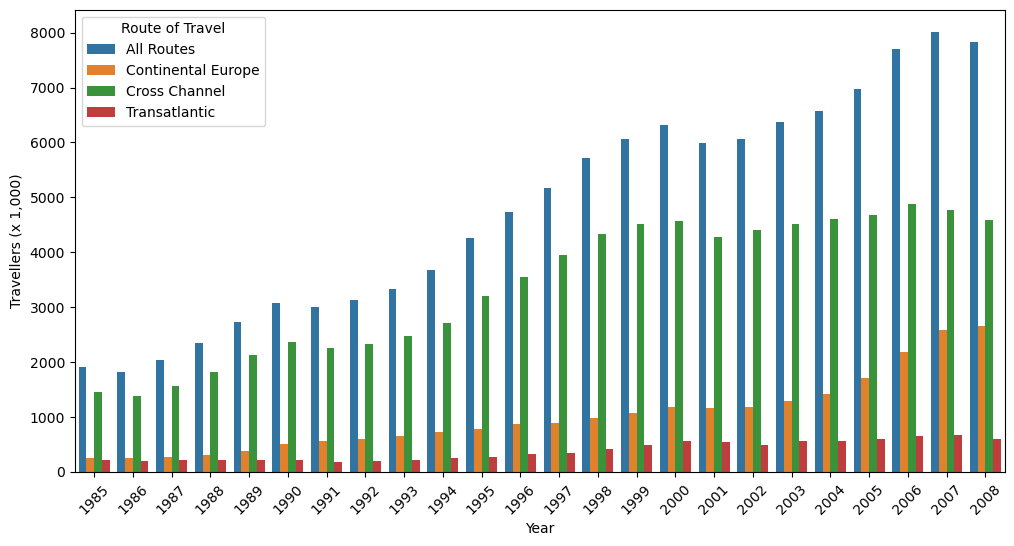

In [19]:
# Assess demographics of tourists travelling to Ireland from different regions over time
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=in_grouped, x="Year", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

## Create Seperate Dataframe of Outbound Travel from Ireland

In [20]:
# Create new seperate dataframes for inbound Irish travel
outtourism_df = tourism_df[tourism_df['Inbound/Outbound'] == 'Visits Abroad by Irish Residents']
outtourism_df = outtourism_df.drop(columns=['Inbound/Outbound'])
#outtourism_df = outtourism_df.drop(outtourism_df[outtourism_df['Route of Travel'] == 'All Routes'].index)
#outtourism_df = outtourism_df.sum(outtourism_df[outtourism_df['Route of Travel'] == 'All Routes'].index)

In [21]:
(outtourism_df.tail(5))

,Route of Travel,Year,Quarter,"Travellers (x 1,000)"
759,Cross Channel,2007,4,679
761,Cross Channel,2008,1,709
763,Cross Channel,2008,2,698
765,Cross Channel,2008,3,742
767,Cross Channel,2008,4,677


In [22]:
outtourism_df.shape

(384, 4)

In [23]:
outtourism_df.describe()

,Year,Quarter,"Travellers (x 1,000)"
count,384.000000,384.000000,384.000000
mean,1996.500000,2.500000,439.934896
std,6.931217,1.119493,448.565853
min,1985.000000,1.000000,5.000000
25%,1990.750000,1.750000,74.250000
50%,1996.500000,2.500000,328.000000
75%,2002.250000,3.250000,617.750000
max,2008.000000,4.000000,2428.000000


In [24]:
# 5 categories for Routes of Travel with column 0 = Sum of columns 1-4
outtourism_df['Route of Travel'].value_counts() 

Route of Travel
All Routes            96
Continental Europe    96
Transatlantic         96
Cross Channel         96
Name: count, dtype: int64

In [25]:
# Create dataframe with values for each quarter of the year summed to give travel from Ireland per year by each route 
out_grouped = outtourism_df.groupby(['Year', 'Route of Travel'], as_index=False).sum().drop(columns=['Quarter'])
out_grouped

,Year,Route of Travel,"Travellers (x 1,000)"
0,1985,All Routes,1257
1,1985,Continental Europe,328
2,1985,Cross Channel,876
3,1985,Transatlantic,54
4,1986,All Routes,1375
5,1986,Continental Europe,350
6,1986,Cross Channel,956
7,1986,Transatlantic,71
8,1987,All Routes,1566
9,1987,Continental Europe,409


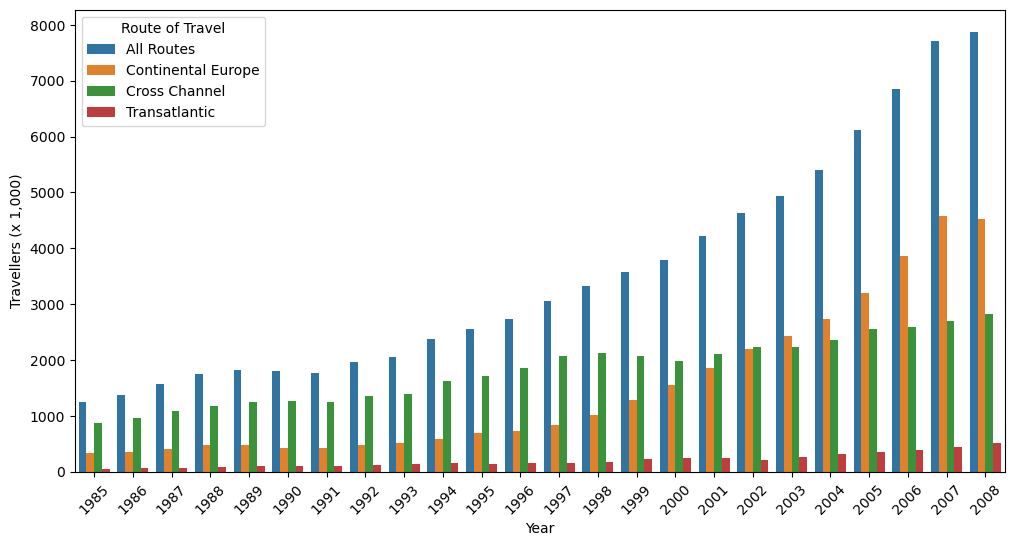

In [26]:
# Assess demographics of tourists travelling from Ireland to different regions over time
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=out_grouped, x="Year", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

## Travel to Ireland by Quarter
Q1: January – March, Q2: April – June, Q3: July – September, Q4: October – December

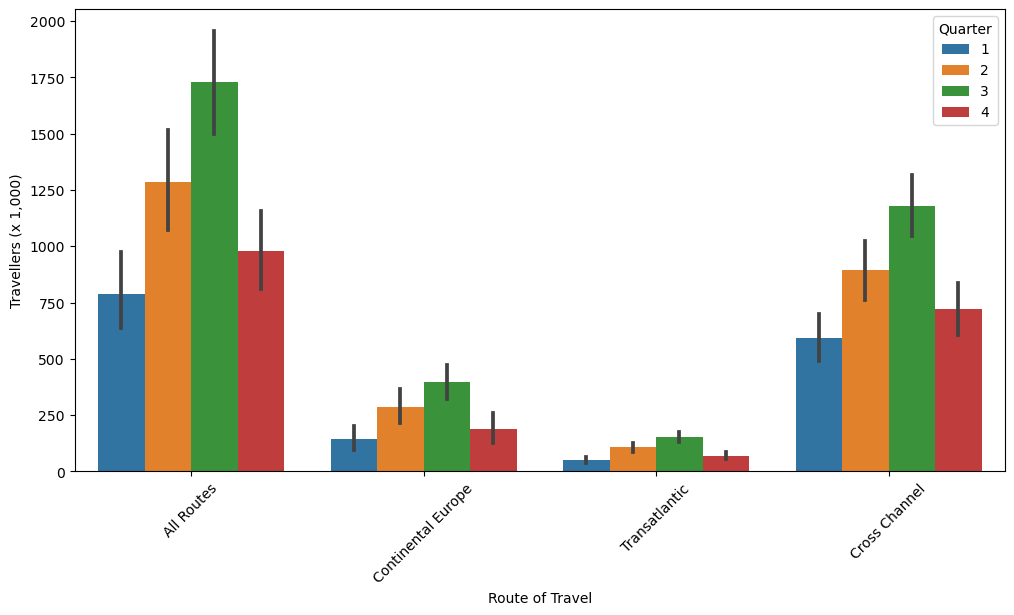

In [27]:
# Assess demographics of tourists travelling to Ireland from different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=intourism_df, x="Route of Travel", y="Travellers (x 1,000)", hue='Quarter')
ax.tick_params(axis='x', labelrotation=45)

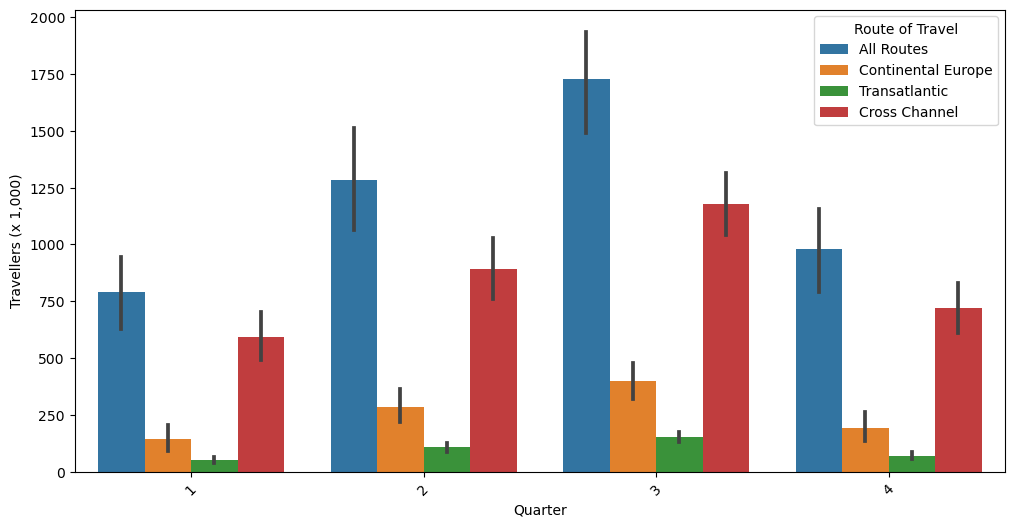

In [28]:
# Assess demographics of tourists travelling to Ireland from different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=intourism_df, x="Quarter", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

## Travel from Ireland by Quarter

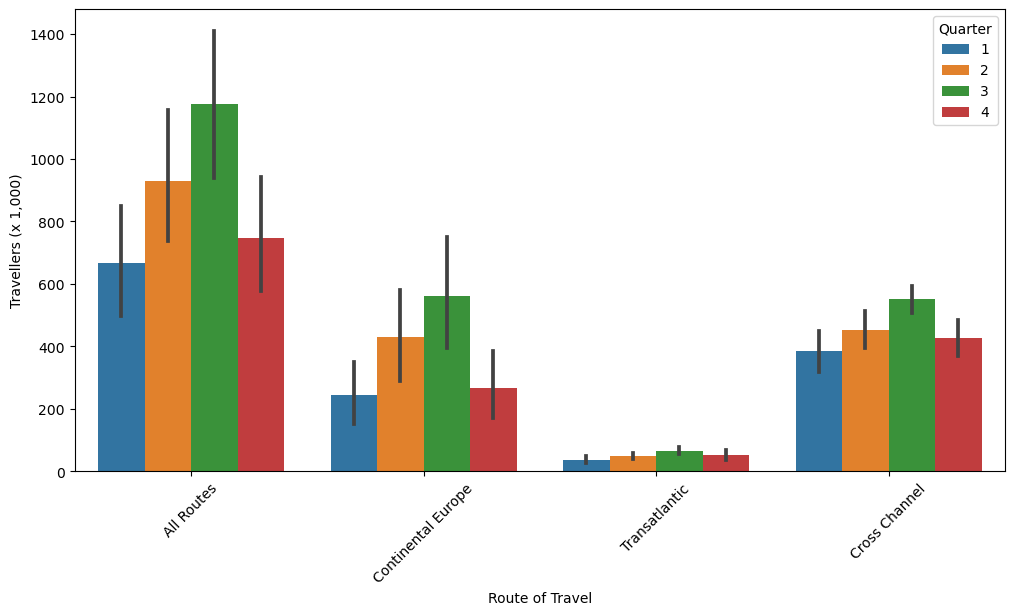

In [29]:
# Assess demographics of tourists travelling from Ireland to different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=outtourism_df, x="Route of Travel", y="Travellers (x 1,000)", hue='Quarter')
ax.tick_params(axis='x', labelrotation=45)

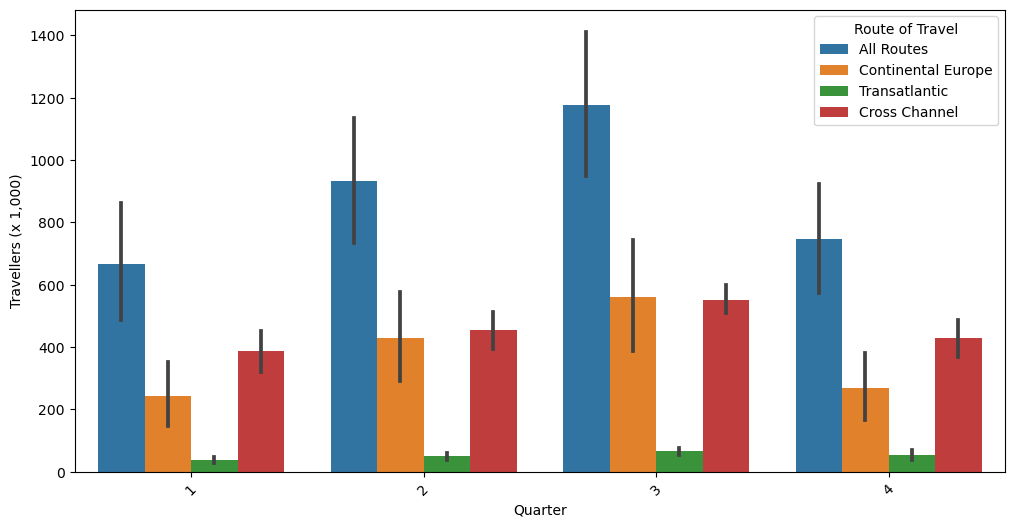

In [30]:
# Assess demographics of tourists travelling from Ireland to different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=outtourism_df, x="Quarter", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

## Lineplot of Tourism out of Ireland

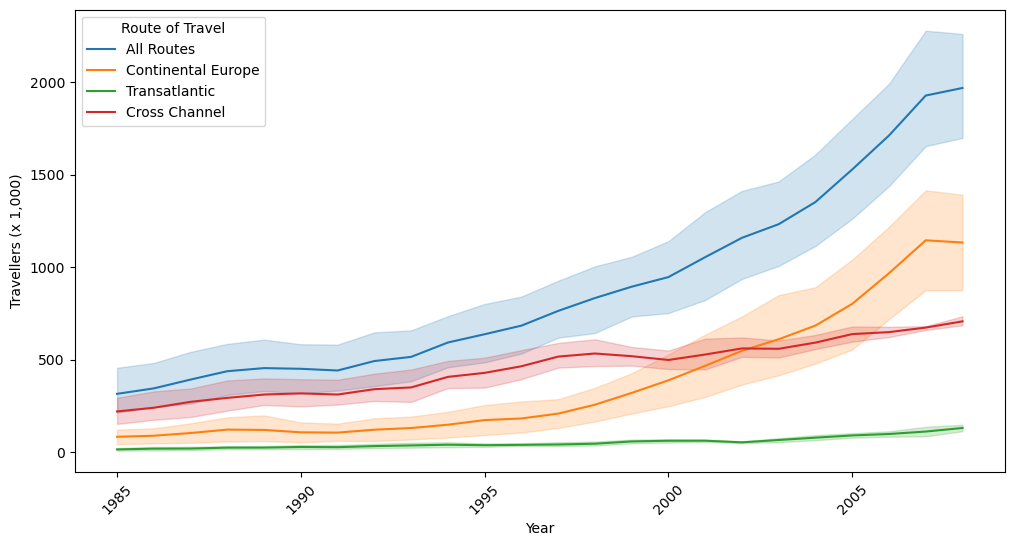

In [31]:
# Assess demographics of tourists travelling from Ireland to different regions per Quarter

plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=outtourism_df, x="Year", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

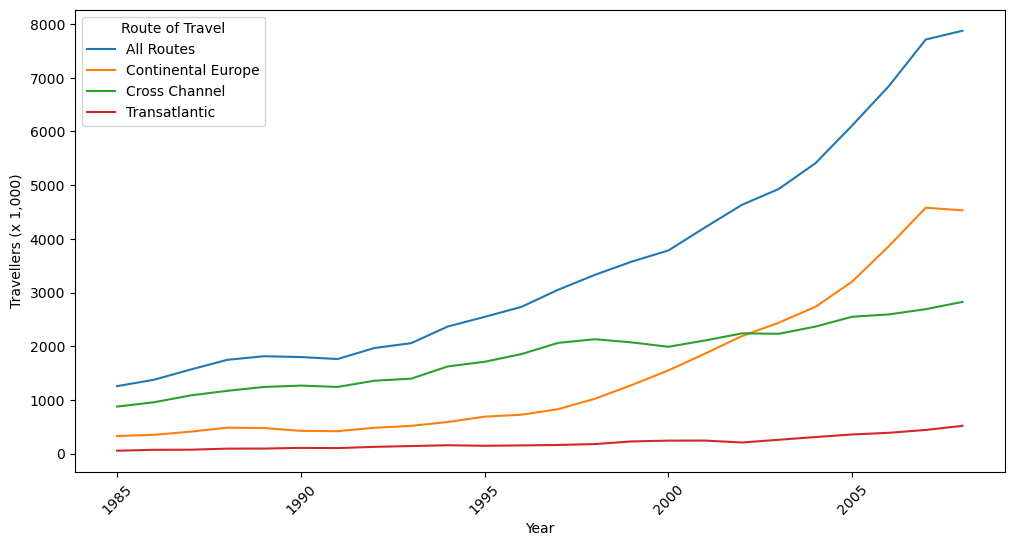

In [32]:
# Assess demographics of tourists travelling from Ireland to different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=out_grouped, x="Year", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

## Lineplot of Tourism into Ireland

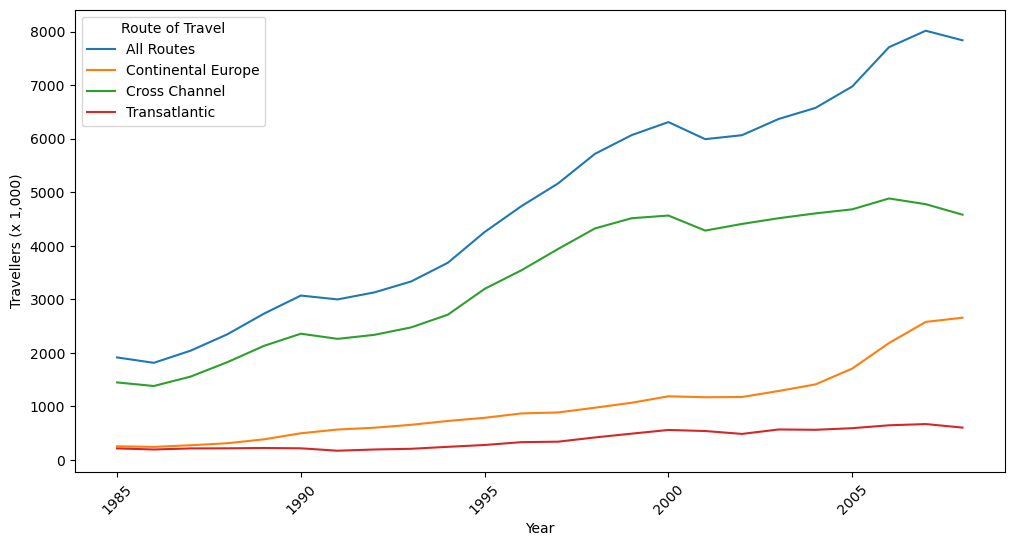

In [33]:
# Assess demographics of tourists travelling from Ireland to different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=in_grouped, x="Year", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)

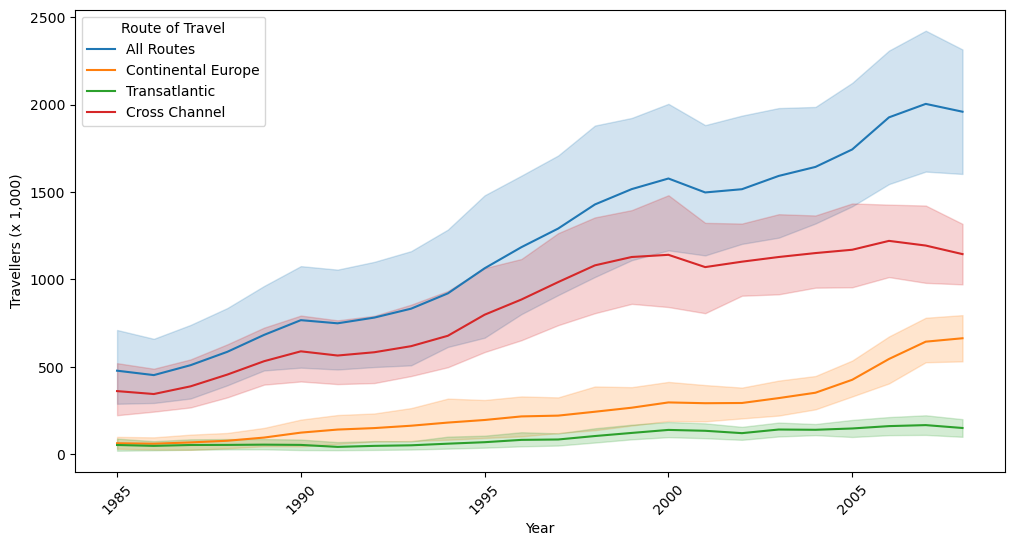

In [37]:
# Assess demographics of tourists travelling from Ireland to different regions per Quarter
plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=intourism_df, x="Year", y="Travellers (x 1,000)", hue='Route of Travel')
ax.tick_params(axis='x', labelrotation=45)